### STUDENT PERFORMANCE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df['avg_score']=(df['math_score']+df['reading_score']+df['writing_score'])/3

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [7]:
df.drop(['math_score','reading_score','writing_score'],axis=1,inplace=True)

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,avg_score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


<Axes: xlabel='avg_score', ylabel='Count'>

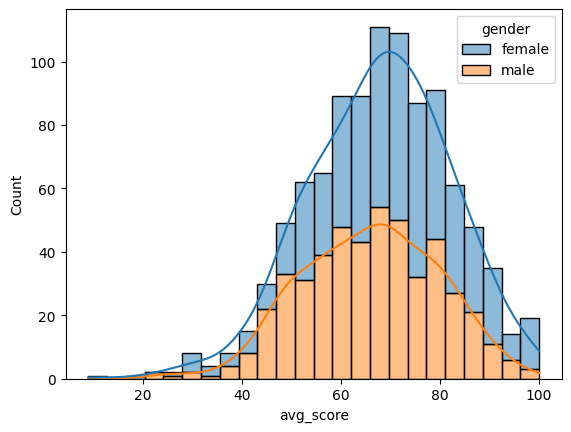

In [9]:
# Plotting the distribution of marks by gender
sns.histplot(data=df, x='avg_score', hue='gender', kde=True, multiple="stack")

<Axes: xlabel='gender', ylabel='avg_score'>

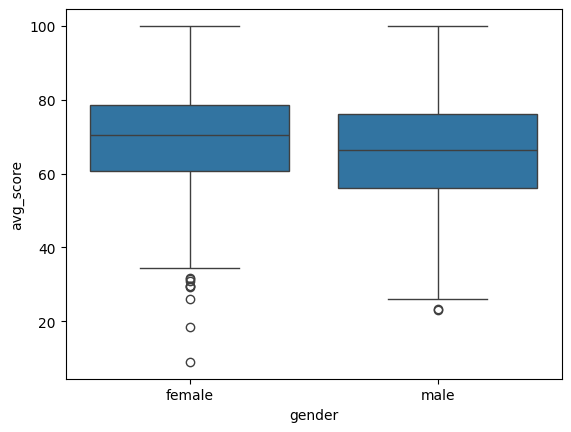

In [10]:
sns.boxplot(data=df, x='gender', y='avg_score')


<Axes: xlabel='avg_score', ylabel='Count'>

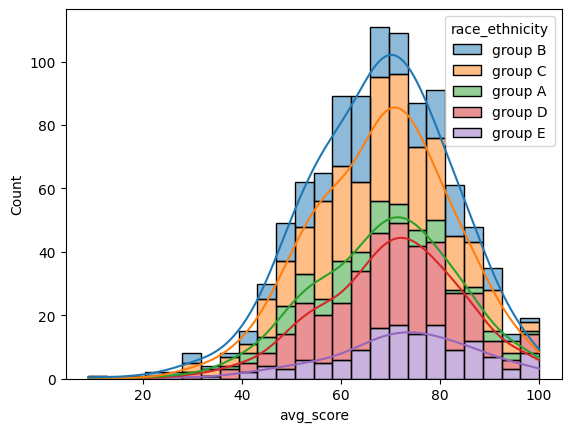

In [11]:

sns.histplot(data=df, x='avg_score', hue='race_ethnicity', kde=True, multiple="stack")

<Axes: xlabel='avg_score', ylabel='Count'>

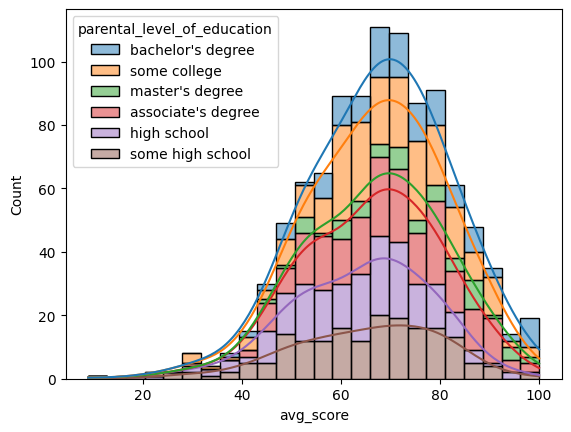

In [12]:

sns.histplot(data=df, x='avg_score', hue='parental_level_of_education', kde=True, multiple="stack")

<Axes: xlabel='avg_score', ylabel='Count'>

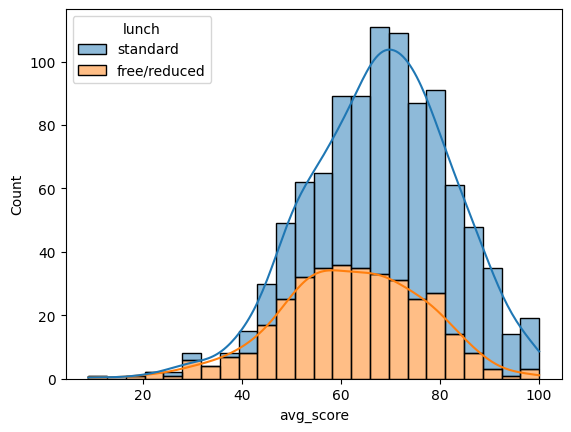

In [13]:

sns.histplot(data=df, x='avg_score', hue='lunch', kde=True, multiple="stack")

<Axes: xlabel='avg_score', ylabel='Count'>

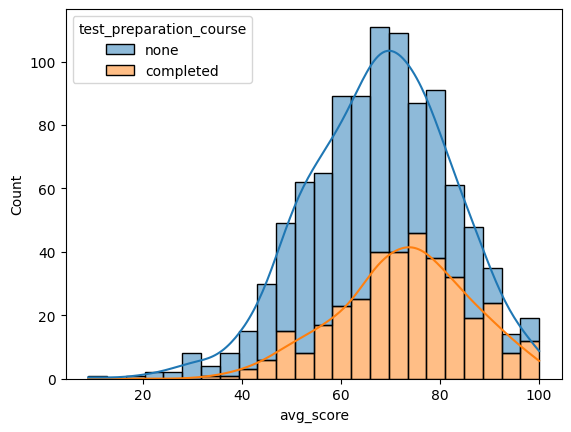

In [14]:

sns.histplot(data=df, x='avg_score', hue='test_preparation_course', kde=True, multiple="stack")

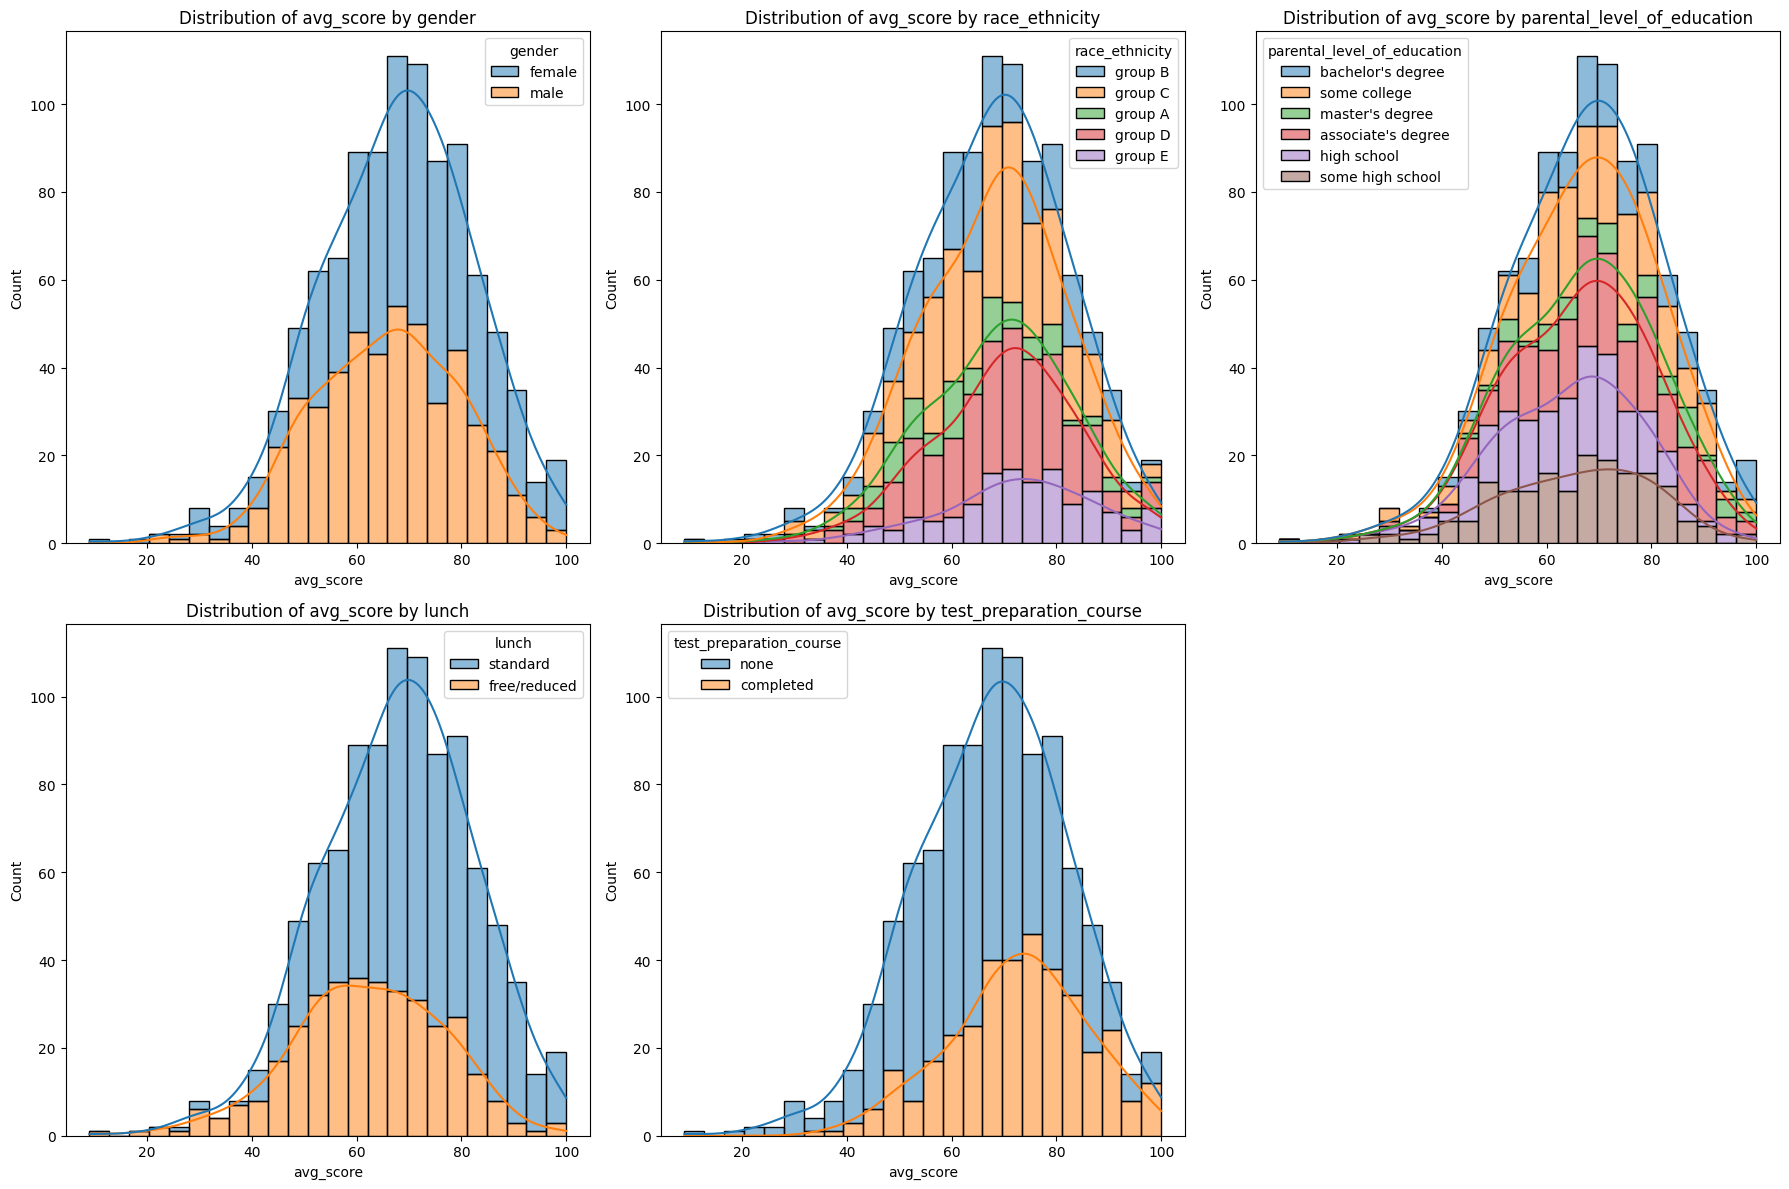

In [15]:

variables = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables):
    sns.histplot(data=df, x='avg_score', hue=var, kde=True, multiple="stack", ax=axes[i])
    axes[i].set_title(f'Distribution of avg_score by {var}')
# Remove any empty subplots (if the number of plots is less than the grid size)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


# Adjust layout
plt.tight_layout()
plt.show()


In [16]:
encoded_df=df

In [17]:
encoded_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,avg_score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [18]:
encoded_df = pd.get_dummies(encoded_df, columns=['gender'], drop_first=True)
encoded_df['gender_male'] = encoded_df['gender_male'].astype(int)

In [19]:
encoded_df = pd.get_dummies(encoded_df, columns=['lunch'], drop_first=True)
encoded_df['lunch_standard'] = encoded_df['lunch_standard'].astype(int)

In [20]:
encoded_df = pd.get_dummies(encoded_df, columns=['test_preparation_course'], drop_first=True)
encoded_df['test_preparation_course_none'] = encoded_df['test_preparation_course_none'].astype(int)

In [21]:
encoded_df

,race_ethnicity,parental_level_of_education,avg_score,gender_male,lunch_standard,test_preparation_course_none
0,group B,bachelor's degree,72.666667,0,1,1
1,group C,some college,82.333333,0,1,0
2,group B,master's degree,92.666667,0,1,1
3,group A,associate's degree,49.333333,1,0,1
4,group C,some college,76.333333,1,1,1
...,...,...,...,...,...,...
995,group E,master's degree,94.000000,0,1,0
996,group C,high school,57.333333,1,0,1
997,group C,high school,65.000000,0,0,0
998,group D,some college,74.333333,0,1,0


In [22]:

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  
encoded = encoder.fit_transform(encoded_df[['race_ethnicity']])
enc_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['race_ethnicity']))
encoded_df = pd.concat([encoded_df,enc_df], axis=1)


In [23]:
encoded_df.drop(['race_ethnicity'],axis=1,inplace=True)
encoded_df.drop(['race_ethnicity_group E'],axis=1,inplace=True)

In [24]:

encoder = OneHotEncoder(sparse_output=False)  
encoded = encoder.fit_transform(encoded_df[['parental_level_of_education']])
enc_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['parental_level_of_education']))
encoded_df = pd.concat([encoded_df,enc_df], axis=1)
encoded_df.drop(['parental_level_of_education'],axis=1,inplace=True)
encoded_df.drop(['parental_level_of_education_master\'s degree'],axis=1,inplace=True)

In [25]:
encoded_df.head()

,avg_score,gender_male,lunch_standard,test_preparation_course_none,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_some college,parental_level_of_education_some high school
0,72.666667,0,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,82.333333,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,92.666667,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49.333333,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,76.333333,1,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
# Move avg_score to the last column
cols = [col for col in encoded_df.columns if col != 'avg_score'] + ['avg_score']
encoded_df = encoded_df[cols]
encoded_df.head()

,gender_male,lunch_standard,test_preparation_course_none,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_some college,parental_level_of_education_some high school,avg_score
0,0,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,72.666667
1,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,82.333333
2,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.666667
3,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49.333333
4,1,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,76.333333


In [27]:
encoded_df.columns

Index(['gender_male', 'lunch_standard', 'test_preparation_course_none',
       'race_ethnicity_group A', 'race_ethnicity_group B',
       'race_ethnicity_group C', 'race_ethnicity_group D',
       'parental_level_of_education_associate's degree',
       'parental_level_of_education_bachelor's degree',
       'parental_level_of_education_high school',
       'parental_level_of_education_some college',
       'parental_level_of_education_some high school', 'avg_score'],
      dtype='object')

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = encoded_df.drop('avg_score', axis=1)
y = encoded_df['avg_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
y_train

29     69.000000
535    77.333333
695    84.666667
557    64.666667
836    64.666667
         ...    
106    95.666667
270    64.333333
860    56.000000
435    50.333333
102    88.333333
Name: avg_score, Length: 800, dtype: float64

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
print(X_train.shape)
print(y_train.shape)

(800, 12)
(800,)


In [33]:
# Initialize and fit the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

print("Feature Importances:\n", feature_importances)


Feature Importances:
                                            feature  importance
1                                   lunch_standard    0.180573
2                     test_preparation_course_none    0.152734
0                                      gender_male    0.111683
4                           race_ethnicity_group B    0.073253
5                           race_ethnicity_group C    0.071914
9          parental_level_of_education_high school    0.069243
6                           race_ethnicity_group D    0.064256
8    parental_level_of_education_bachelor's degree    0.061503
11    parental_level_of_education_some high school    0.059499
7   parental_level_of_education_associate's degree    0.058677
3                           race_ethnicity_group A    0.051440
10        parental_level_of_education_some college    0.045225


In [34]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np


In [37]:
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
}


In [38]:
for name, model in models.items():
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
    feature_importances = feature_importances.sort_values(by='importance', ascending=False)
    print("Feature Importances:\n", feature_importances)


Feature Importances:
                                            feature  importance
1                                   lunch_standard    0.225429
2                     test_preparation_course_none    0.195253
0                                      gender_male    0.106470
5                           race_ethnicity_group C    0.068508
11    parental_level_of_education_some high school    0.068472
9          parental_level_of_education_high school    0.059992
8    parental_level_of_education_bachelor's degree    0.057279
4                           race_ethnicity_group B    0.055064
6                           race_ethnicity_group D    0.055017
3                           race_ethnicity_group A    0.043456
10        parental_level_of_education_some college    0.032703
7   parental_level_of_education_associate's degree    0.032357
Feature Importances:
                                            feature  importance
1                                   lunch_standard    0.180853
2          

In [39]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}


In [40]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        'RMSE': rmse,
        'R²': r2
    }
    print(f"{name} - RMSE: {rmse}, R²: {r2}")


Linear Regression - RMSE: 13.401579844788278, R²: 0.16217185763155184
Ridge Regression - RMSE: 13.415184276606803, R²: 0.16046997452190515
Lasso Regression - RMSE: 14.133786309922488, R²: 0.06812000322242895
Decision Tree - RMSE: 15.088046646722841, R²: -0.061962017461760555
Random Forest - RMSE: 14.927248970643284, R²: -0.03944736017558825
Gradient Boosting - RMSE: 13.972866486678901, R²: 0.089218991139845
Support Vector Regressor - RMSE: 13.744610762357013, R²: 0.11873232871030626
K-Nearest Neighbors - RMSE: 15.022162886141855, R²: -0.05270789790966024
Neural Network - RMSE: 14.024697356682516, R²: 0.08244956755599075


c:\Users\user\tutorials\github\student_performance\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
best_model = min(results, key=lambda x: results[x]['RMSE'])
print(f"Best Model: {best_model} with RMSE: {results[best_model]['RMSE']} and R²: {results[best_model]['R²']}")


Best Model: Linear Regression with RMSE: 13.401579844788278 and R²: 0.16217185763155184


### 2.use only those models that support rfe

In [45]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
}

# Hyperparameters for GridSearchCV
param_grids = {
    "Linear Regression": {},
    "Ridge Regression": {"alpha": [0.01, 0.1, 1, 10, 100]},
    "Lasso Regression": {"alpha": [0.01, 0.1, 1, 10, 100]},
    "Decision Tree": {"max_depth": [None, 10, 20, 30, 40, 50]},
    "Random Forest": {"n_estimators": [10, 50, 100], "max_depth": [None, 10, 20, 30]},
    "Gradient Boosting": {"n_estimators": [10, 50, 100], "learning_rate": [0.01, 0.1, 1]},
}

# Iterating through each model
results = {}

for name, model in models.items():
    # Recursive Feature Elimination (RFE)
    selector = RFE(model, n_features_to_select=5, step=1)
    selector = selector.fit(X_train, y_train)
    
    # Selecting important features
    important_features = X.columns[selector.support_]
    print(f"Selected features for {name}: {important_features}")

    # Updating the feature matrix with selected features
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)
    
    # GridSearchCV to find best parameters
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_selected, y_train)
    
    # Best parameters
    best_params = grid_search.best_params_
    print(f"Best parameters for {name}: {best_params}")
    
    # Training model with best parameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train_selected, y_train)
    
    # Prediction and evaluation
    y_pred = best_model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'Best Parameters': best_params,
        'RMSE': rmse,
        'R²': r2,
        'Selected Features': important_features
    }
    
    print(f"{name} - RMSE: {rmse}, R²: {r2}\n")

# Finding the best model based on RMSE
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
print(f"Best model: {best_model_name}")
print(f"Details: {results[best_model_name]}")


Selected features for Linear Regression: Index(['gender_male', 'lunch_standard', 'test_preparation_course_none',
       'parental_level_of_education_high school',
       'parental_level_of_education_some high school'],
      dtype='object')
Best parameters for Linear Regression: {}
Linear Regression - RMSE: 13.521708785888455, R²: 0.14708430827891994

Selected features for Ridge Regression: Index(['gender_male', 'lunch_standard', 'test_preparation_course_none',
       'parental_level_of_education_bachelor's degree',
       'parental_level_of_education_high school'],
      dtype='object')
Best parameters for Ridge Regression: {'alpha': 1}
Ridge Regression - RMSE: 13.981116013952695, R²: 0.08814323037809935

Selected features for Lasso Regression: Index(['gender_male', 'lunch_standard', 'test_preparation_course_none',
       'parental_level_of_education_some college',
       'parental_level_of_education_some high school'],
      dtype='object')
Best parameters for Lasso Regression: {'alp

In [46]:

results = {}

for name, model in models.items():
    print(name)
    print('------------')
    print(model)

Linear Regression
------------
LinearRegression()
Ridge Regression
------------
Ridge()
Lasso Regression
------------
Lasso()
Decision Tree
------------
DecisionTreeRegressor()
Random Forest
------------
RandomForestRegressor()
Gradient Boosting
------------
GradientBoostingRegressor()


### 2.Use SelectKBest for Models Without coef_ or feature_importances_

In [48]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define parameter grids for the models
param_grids = {
    "Support Vector Regressor": {"C": [0.1, 1, 10], "epsilon": [0.01, 0.1, 1]},
    "K-Nearest Neighbors": {"n_neighbors": [3, 5, 7, 9]},
    "Neural Network": {"hidden_layer_sizes": [(50,), (100,), (100, 50)], "alpha": [0.0001, 0.001, 0.01]}
}

# Use SelectKBest for models without feature importance attributes
models_with_selectkbest = {
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

results = {}

for name, model in models_with_selectkbest.items():
    print(f"Processing {name}...")

    # Select the top 5 features using SelectKBest
    selector = SelectKBest(score_func=f_regression, k=5)
    selector.fit(X_train, y_train)
    
    # Selecting important features
    important_features = X.columns[selector.get_support()]
    print(f"Selected features for {name}: {important_features.tolist()}")
    
    # Updating the feature matrix with selected features
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)
    
    # Ensure the parameter grid exists for the model
    if name in param_grids:
        # GridSearchCV to find best parameters
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_selected, y_train)
        
        # Best parameters
        best_params = grid_search.best_params_
        print(f"Best parameters for {name}: {best_params}")
        
        # Training model with best parameters
        best_model = grid_search.best_estimator_
        best_model.fit(X_train_selected, y_train)
        
        # Prediction and evaluation
        y_pred = best_model.predict(X_test_selected)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {
            'Best Parameters': best_params,
            'RMSE': rmse,
            'R²': r2,
            'Selected Features': important_features.tolist()
        }
        
        print(f"{name} - RMSE: {rmse}, R²: {r2}\n")
    else:
        print(f"No parameter grid found for {name}.")



Processing Support Vector Regressor...
Selected features for Support Vector Regressor: ['gender_male', 'lunch_standard', 'test_preparation_course_none', "parental_level_of_education_bachelor's degree", 'parental_level_of_education_high school']
Best parameters for Support Vector Regressor: {'C': 10, 'epsilon': 1}
Support Vector Regressor - RMSE: 14.08887701721531, R²: 0.07403258496520326

Processing K-Nearest Neighbors...
Selected features for K-Nearest Neighbors: ['gender_male', 'lunch_standard', 'test_preparation_course_none', "parental_level_of_education_bachelor's degree", 'parental_level_of_education_high school']
Best parameters for K-Nearest Neighbors: {'n_neighbors': 9}
K-Nearest Neighbors - RMSE: 14.841077185179683, R²: -0.027480989416388546

Processing Neural Network...
Selected features for Neural Network: ['gender_male', 'lunch_standard', 'test_preparation_course_none', "parental_level_of_education_bachelor's degree", 'parental_level_of_education_high school']


c:\Users\user\tutorials\github\student_performance\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\tutorials\github\student_performance\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\tutorials\github\student_performance\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\tutorials\github\student_performance\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and 

Best parameters for Neural Network: {'alpha': 0.001, 'hidden_layer_sizes': (50,)}
Neural Network - RMSE: 13.983273376169128, R²: 0.08786179975198083



c:\Users\user\tutorials\github\student_performance\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
